In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
from textblob import TextBlob
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


[nltk_data] Downloading package stopwords to C:\Users\Adhitya
[nltk_data]     Ramakrishnan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Adhitya
[nltk_data]     Ramakrishnan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
df = pd.read_csv('recmax.csv')

In [3]:
df.head()

,Unnamed: 0,Date,User,Tweet
0,0,2023-02-28 13:16:53+00:00,VKMacro,State level recession risks now also receding
1,1,2023-02-28 13:16:20+00:00,CathyPe63220996,"Let’s not forget, because Democrats hatred of ..."
2,2,2023-02-28 13:16:19+00:00,Aryanof21856839,@J__Rana @ndtv Yeah IMF is sanghi now 🤣🤣...the...
3,3,2023-02-28 13:16:16+00:00,T_Nenninger,@Leamsi_fmz Plusieurs choses. Un risque de réc...
4,4,2023-02-28 13:15:59+00:00,GuardKnox,This month's newsletter included an exclusive ...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  100000 non-null  int64 
 1   Date        100000 non-null  object
 2   User        100000 non-null  object
 3   Tweet       100000 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.1+ MB


In [5]:
df.isnull().sum()

Unnamed: 0    0
Date          0
User          0
Tweet         0
dtype: int64

In [6]:
df.columns

Index(['Unnamed: 0', 'Date', 'User', 'Tweet'], dtype='object')

In [7]:
Tweet_df = df.drop(['Unnamed: 0', 'Date', 'User'], axis = 1)
Tweet_df.head()

,Tweet
0,State level recession risks now also receding
1,"Let’s not forget, because Democrats hatred of ..."
2,@J__Rana @ndtv Yeah IMF is sanghi now 🤣🤣...the...
3,@Leamsi_fmz Plusieurs choses. Un risque de réc...
4,This month's newsletter included an exclusive ...


In [8]:
print(Tweet_df['Tweet'].iloc[0],"\n")
print(Tweet_df['Tweet'].iloc[1],"\n")
print(Tweet_df['Tweet'].iloc[2],"\n")
print(Tweet_df['Tweet'].iloc[3],"\n")
print(Tweet_df['Tweet'].iloc[4],"\n")


State level recession risks now also receding 

Let’s not forget, because Democrats hatred of Trump, they held back medicines that would’ve saved lives, they shut our country down, masked babies &amp; now we’re headed for a full-blown recession. Yet, still blame Trump. If not so criminal, one would swear they’re in bed with China. 

@J__Rana @ndtv Yeah IMF is sanghi now 🤣🤣...these chamchas lol
When others in recession and begging for loan bailouts...india still growing 
I dont know what would happened if corruptgress was in power 😲😲 https://t.co/mYcnbkW6ts 

@Leamsi_fmz Plusieurs choses. Un risque de récession majeure avec licenciements (effet économique du relèvement des taux). 
Mais surtout un risque majeur de divergence des spreads sur l’euro, et donc d’explosion de la zone euro. 

This month's newsletter included an exclusive guide from our CRO on how auto companies can stay profitable and productive during an economic recession. It's going live tomorrow, subscribe now so you don’t

In [9]:
Tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   Tweet   100000 non-null  object
dtypes: object(1)
memory usage: 781.4+ KB


In [10]:
def data_processing(Tweet):
    Tweet = Tweet.lower()
    Tweet = re.sub(r"https\S+|www\S+https\S+", '',Tweet, flags=re.MULTILINE)
    Tweet = re.sub(r'\@w+|\#','',Tweet)
    Tweet = re.sub(r'[^\w\s]','',Tweet)
    Tweet_tokens = word_tokenize(Tweet)
    filtered_Tweet = [w for w in Tweet_tokens if not w in stop_words]
    return " ".join(filtered_Tweet)

In [11]:
Tweet_df.Tweet = Tweet_df['Tweet'].apply(data_processing)

In [12]:
Tweet_df = Tweet_df.drop_duplicates('Tweet')

In [13]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [14]:
Tweet_df['Tweet'] = Tweet_df['Tweet'].apply(lambda x: stemming(x))


In [15]:
Tweet_df.head()

,Tweet
0,state level recession risks also receding
1,lets forget democrats hatred trump held back m...
2,j__rana ndtv yeah imf sanghi chamchas lol othe...
3,leamsi_fmz plusieurs choses un risque de réces...
4,months newsletter included exclusive guide cro...


In [16]:
print(Tweet_df['Tweet'].iloc[0],"\n")
print(Tweet_df['Tweet'].iloc[1],"\n")
print(Tweet_df['Tweet'].iloc[2],"\n")
print(Tweet_df['Tweet'].iloc[3],"\n")
print(Tweet_df['Tweet'].iloc[4],"\n")

state level recession risks also receding 

lets forget democrats hatred trump held back medicines wouldve saved lives shut country masked babies amp headed fullblown recession yet still blame trump criminal one would swear theyre bed china 

j__rana ndtv yeah imf sanghi chamchas lol others recession begging loan bailoutsindia still growing dont know would happened corruptgress power 

leamsi_fmz plusieurs choses un risque de récession majeure avec licenciements effet économique du relèvement des taux mais surtout un risque majeur de divergence des spreads sur leuro et donc dexplosion de la zone euro 

months newsletter included exclusive guide cro auto companies stay profitable productive economic recession going live tomorrow subscribe dont miss autonews 



In [17]:
Tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88249 entries, 0 to 99998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Tweet   88249 non-null  object
dtypes: object(1)
memory usage: 1.3+ MB


In [22]:
def polarity(Tweet):
    return TextBlob(Tweet).sentiment.polarity

In [23]:
Tweet_df['polarity'] = Tweet_df['Tweet'].apply(polarity)

In [25]:
Tweet_df.head(10)

,Tweet,polarity
0,state level recession risks also receding,0.000000
1,lets forget democrats hatred trump held back m...,-0.200000
2,j__rana ndtv yeah imf sanghi chamchas lol othe...,0.800000
3,leamsi_fmz plusieurs choses un risque de réces...,0.000000
4,months newsletter included exclusive guide cro...,0.168182
5,however untimely termination rate hike process...,0.000000
6,gowrang_c grateful got opportunity tweet oppor...,0.000000
7,statelevel economic data tell us risk us reces...,0.200000
8,darkage4 energycrisis foodinsecurity recession...,0.250000
9,_j__f exactly price cuts hand also close reces...,0.475000


In [26]:
def sentiment(label):
    if label <0:
        return "Negative"
    elif label ==0:
        return "Neutral"
    elif label>0:
        return "Positive"

In [27]:
Tweet_df['sentiment'] = Tweet_df['polarity'].apply(sentiment)

In [28]:
Tweet_df.head(10)

,Tweet,polarity,sentiment
0,state level recession risks also receding,0.000000,Neutral
1,lets forget democrats hatred trump held back m...,-0.200000,Negative
2,j__rana ndtv yeah imf sanghi chamchas lol othe...,0.800000,Positive
3,leamsi_fmz plusieurs choses un risque de réces...,0.000000,Neutral
4,months newsletter included exclusive guide cro...,0.168182,Positive
5,however untimely termination rate hike process...,0.000000,Neutral
6,gowrang_c grateful got opportunity tweet oppor...,0.000000,Neutral
7,statelevel economic data tell us risk us reces...,0.200000,Positive
8,darkage4 energycrisis foodinsecurity recession...,0.250000,Positive
9,_j__f exactly price cuts hand also close reces...,0.475000,Positive


<AxesSubplot:xlabel='sentiment', ylabel='count'>

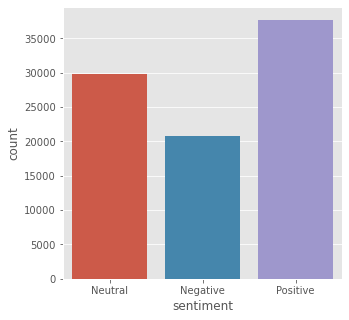

In [29]:
fig = plt.figure(figsize=(5,5))
sns.countplot(x='sentiment', data = Tweet_df)

Text(0.5, 1.0, 'Distribution of sentiments')

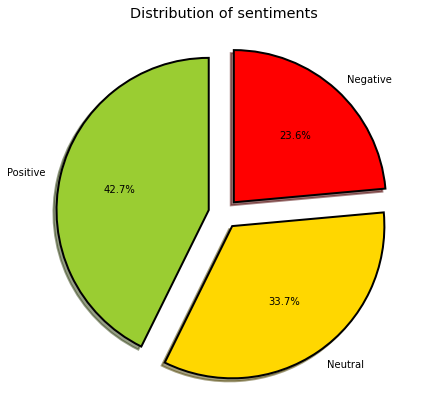

In [30]:
fig = plt.figure(figsize=(7,7))
colors = ("yellowgreen", "gold", "red")
wp = {'linewidth':2, 'edgecolor':"black"}
tags = Tweet_df['sentiment'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind='pie', autopct='%1.1f%%', shadow=True, colors = colors,
         startangle=90, wedgeprops = wp, explode = explode, label='')
plt.title('Distribution of sentiments')

In [31]:
pos_tweets = Tweet_df[Tweet_df.sentiment == 'Positive']
pos_tweets = pos_tweets.sort_values(['polarity'], ascending= False)
pos_tweets.head()

,Tweet,polarity,sentiment
50796,best case chop sideways years recession,1.0,Positive
23615,mariabartiromo econguyrosie morningsmaria foxb...,1.0,Positive
64605,allstreetsilv zimbabwe best performing stock m...,1.0,Positive
64569,macroalf best indicator go talk strippers earn...,1.0,Positive
33272,lthe_z cest qd même excellent léa salamé qui d...,1.0,Positive


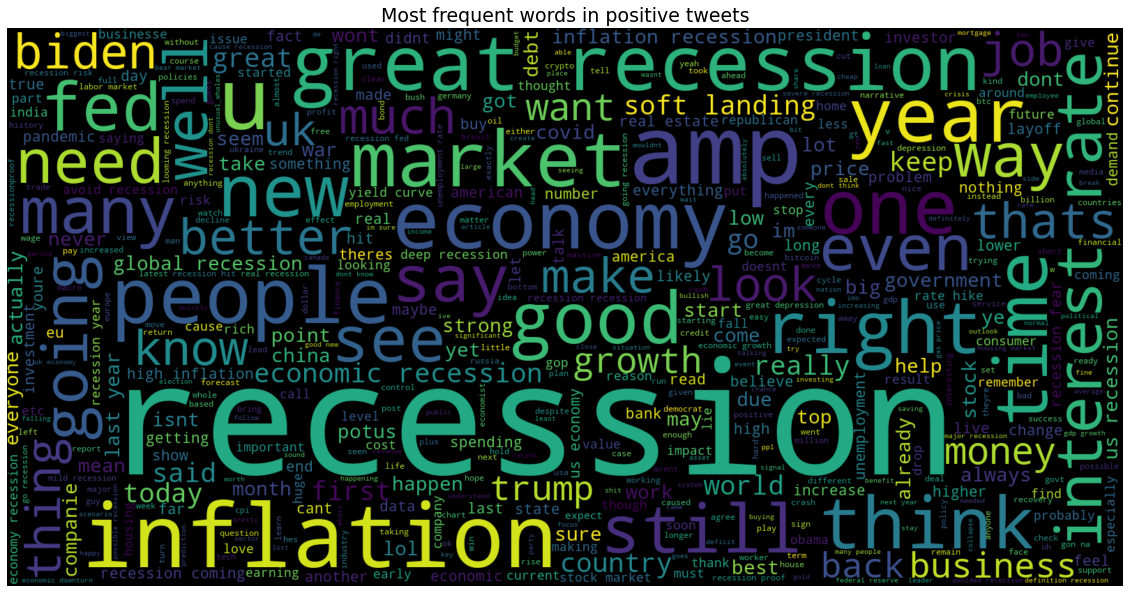

In [32]:
Tweet = ' '.join([word for word in pos_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(Tweet)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in positive tweets', fontsize=19)
plt.show()

In [33]:
neg_tweets = Tweet_df[Tweet_df.sentiment == 'Negative']
neg_tweets = neg_tweets.sort_values(['polarity'], ascending= False)
neg_tweets.head()

,Tweet,polarity,sentiment
57955,first dnc destroy economy jobs rises inflation...,-4.625929e-18,Negative
50246,grogsgamut theres reason australia enter decen...,-5.551115e-18,Negative
34896,kevinparme rjrcapital early 1980s recession se...,-5.551115e-18,Negative
54412,petervwha danielanadj sure understand recessio...,-5.551115e-18,Negative
88926,tomwgiles1 nickadamsinusa potus understand eco...,-6.938894e-18,Negative


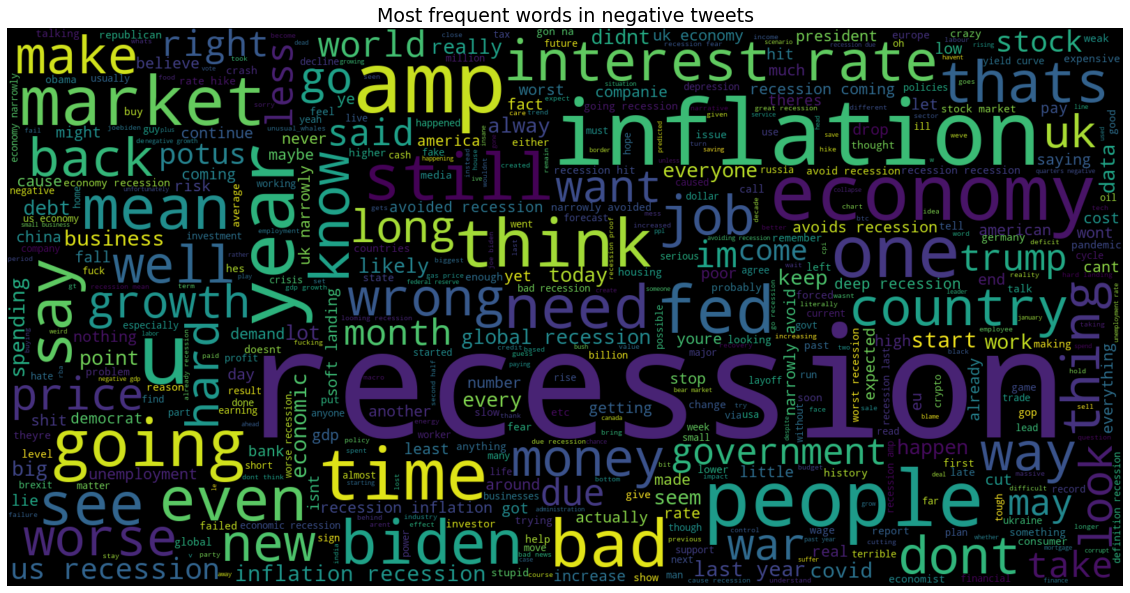

In [34]:
Tweet = ' '.join([word for word in neg_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(Tweet)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in negative tweets', fontsize=19)
plt.show()

In [35]:
neutral_tweets = Tweet_df[Tweet_df.sentiment == 'Neutral']
neutral_tweets = neutral_tweets.sort_values(['polarity'], ascending= False)
neutral_tweets.head()

,Tweet,polarity,sentiment
0,state level recession risks also receding,0.0,Neutral
66428,pastynome stagflation recession,0.0,Neutral
66483,datta_arvind baying price 50 lac sell property...,0.0,Neutral
66482,daily mail comment cut business taxes recessio...,0.0,Neutral
66470,inflationamp recession world defeat,0.0,Neutral


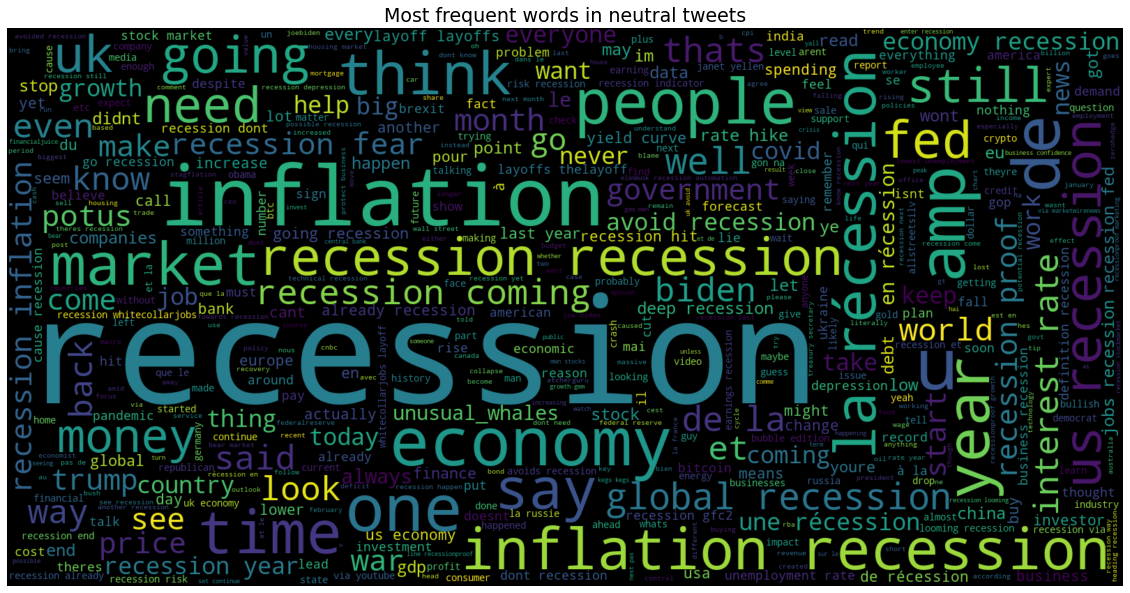

In [36]:
Tweet = ' '.join([word for word in neutral_tweets['Tweet']])
plt.figure(figsize=(20,15), facecolor='None')
wordcloud = WordCloud(max_words=500, width=1600, height=800).generate(Tweet)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most frequent words in neutral tweets', fontsize=19)
plt.show()

In [37]:
vect = CountVectorizer(ngram_range=(1,2)).fit(Tweet_df['Tweet'])

In [38]:
feature_names = vect.get_feature_names()
print("Number of features: {}\n".format(len(feature_names)))
print("First 20 features:\n {}".format(feature_names[:20]))

Number of features: 934349

First 20 features:
 ['00', '00 01', '00 05', '00 07', '00 08', '00 39', '00 91', '00 amp', '00 au', '00 dozen', '00 etc', '00 fed', '00 flat', '00 government', '00 growth', '00 guess', '00 per', '00 previous', '00 q4', '00 qoq']


E:\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [39]:
X = Tweet_df['Tweet']
Y = Tweet_df['sentiment']
X = vect.transform(X)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
print("Size of x_train:", (x_train.shape))
print("Size of y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of y_test:", (y_test.shape))

Size of x_train: (70599, 934349)
Size of y_train: (70599,)
Size of x_test: (17650, 934349)
Size of y_test: (17650,)


In [42]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 91.78%


E:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
-